# Diplodatos Kaggle Competition

We present this peace of code to create the baseline for the competition, and as an example of how to deal with these kind of problems. The main goals are that you:

1. Learn
1. Try different models and see which one fits the best the given data
1. Get a higher score than the given one in the current baseline example
1. Try to get the highest score in the class :)

In [8]:
# Import the required packages
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, Ridge
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
# load the given labels
breed = pd.read_csv('../data/breed_labels.csv')
color = pd.read_csv('../data/color_labels.csv')
state = pd.read_csv('../data/state_labels.csv')

Now we take a look at the labels, just to understand what these are

In [3]:
breed.head()

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


In [4]:
color.head()

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream


In [5]:
state

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan
5,41324,Melaka
6,41332,Negeri Sembilan
7,41335,Pahang
8,41330,Perak
9,41380,Perlis


And now we are ready to deal with the *original* dataset...

In [3]:
original_df = pd.read_csv('../data/train.csv')

In [7]:
original_df.columns

Index(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'Description',
       'AdoptionSpeed', 'PID'],
      dtype='object')

In [8]:
original_df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,AdoptionSpeed,PID
count,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000
mean,1.454734,10.520412,265.469854,74.388868,1.779059,2.230675,3.236912,1.856738,1.860518,1.460971,1.729730,1.566528,1.912115,1.036666,1.584011,20.809960,41345.994613,2.518900,7477.025799
std,0.497970,18.374027,60.121490,123.434010,0.684763,1.743985,2.748595,2.974465,0.547535,0.593843,0.670791,0.701482,0.564041,0.198228,1.488348,78.397243,32.409109,1.176018,4310.921553
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,2.000000,3768.250000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,2.000000,7473.500000
75%,2.000000,12.000000,307.000000,188.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,4.000000,11200.750000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,4.000000,14992.000000


In [21]:
original_df.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,Description,AdoptionSpeed,PID
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,Nibble is a 3+ month old ball of cuteness. He ...,2,0
1,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,"Good guard dog, very alert, active, obedience ...",2,3
2,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,This handsome yet cute boy is up for adoption....,2,4
3,2,3,266,0,2,5,6,0,2,1,2,2,2,1,1,0,41326,This is a stray kitten that came to my house. ...,2,5
4,2,12,264,264,1,1,0,0,2,3,2,2,3,1,1,300,41326,anyone within the area of ipoh or taiping who ...,1,6


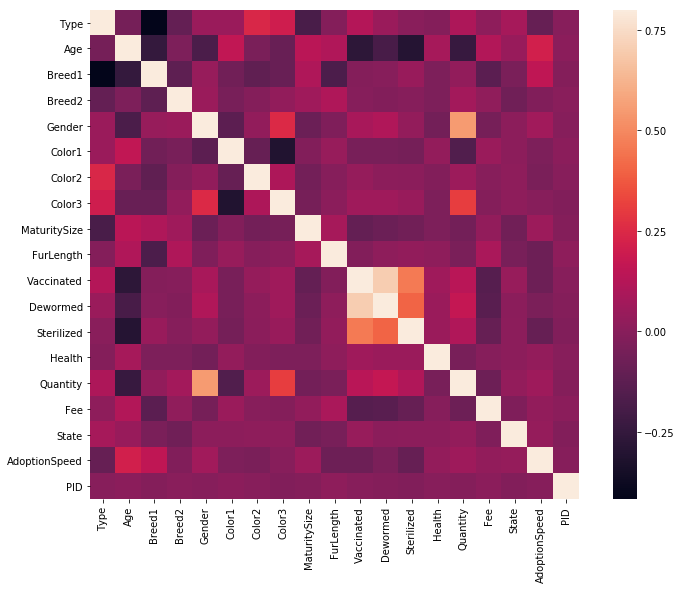

In [31]:
corrmat = original_df.corr(method ='spearman')
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [33]:
corrmat.AdoptionSpeed.sort_values()

Type            -0.094923
Sterilized      -0.094046
FurLength       -0.079187
Vaccinated      -0.076695
Color2          -0.039401
Dewormed        -0.033971
Color1          -0.030403
Breed2          -0.019086
PID             -0.007409
Color3          -0.001718
Fee              0.028547
Health           0.033634
State            0.035808
MaturitySize     0.057459
Quantity         0.060318
Gender           0.072308
Breed1           0.156132
Age              0.210403
AdoptionSpeed    1.000000
Name: AdoptionSpeed, dtype: float64

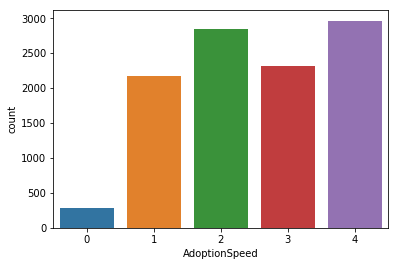

In [39]:
sns.countplot(original_df.AdoptionSpeed)

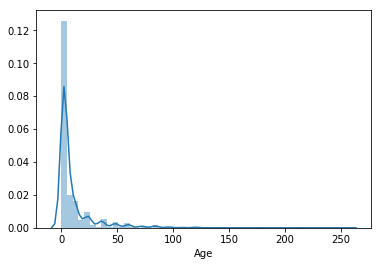

In [43]:
sns.distplot(original_df.Age)

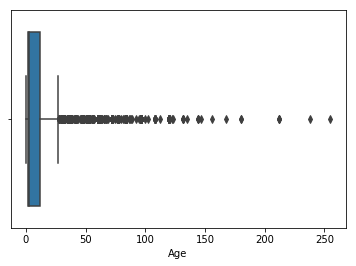

In [46]:
sns.boxplot(original_df.Age)

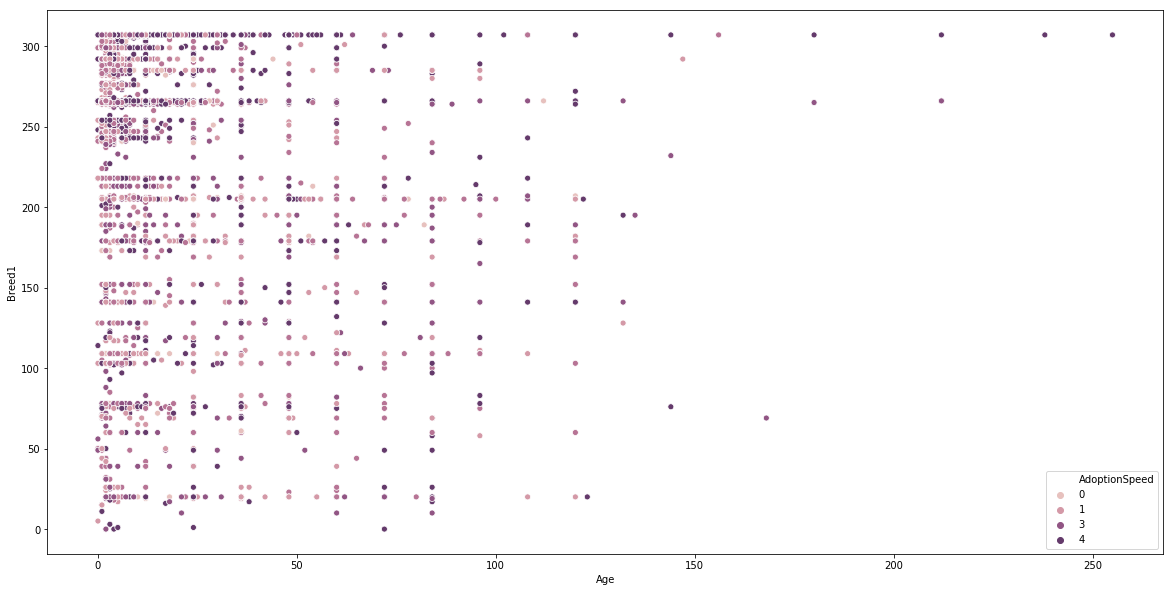

In [49]:
plt.figure(figsize=(20,10))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)

ax = sns.scatterplot(x="Age", y="Breed1", hue="AdoptionSpeed", data=original_df, palette=cmap)

Create a function to transform the datasets. This is done by means of a function so that the transformations are the same for the training and testing datasets... We replace the encodings just to make it easy to "visualize" the data

In [4]:
def transform_data(train_data_fname, test_data_fname):
    def transform_columns(df):
        df = df.drop(["Description"], axis=1)
        df.Type = df.Type.replace({1: 'Dog', 2: 'Cat'})
        df.Gender = df.Gender.replace({1:'Male', 2:'Female', 3:'Mixed'})
        df.MaturitySize = df.MaturitySize.replace({1:'S', 2:'M', 3:'L', 4:'XL', 0:'N/A'})
        df.FurLength = df.FurLength.replace({1:'S', 2:'M', 3:'L', 0:'N/A'})
        df.Vaccinated = df.Vaccinated.replace({1:'T', 2:'N', 3:'N/A'})
        df.Dewormed = df.Dewormed.replace({1:'T', 2:'F', 3:'N/A'})
        df.Sterilized = df.Sterilized.replace({1:'T', 2:'F', 3:'N/A'})
        df.Health = df.Health.replace({1:'Healthy', 2: 'MinorInjury', 3:'SeriousInjury', 0: 'N/A'})
        df.Color1 = df.Color1.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
        df.Color2 = df.Color2.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
        df.Color3 = df.Color3.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
        df.Breed1 = df.Breed1.replace(dict(list(zip(breed.BreedID, breed.BreedName)) + [(0, "N/A")]))
        df.Breed2 = df.Breed2.replace(dict(list(zip(breed.BreedID, breed.BreedName)) + [(0, "N/A")]))
        return df
    
    df_train = pd.read_csv(train_data_fname)
    df_train = transform_columns(df_train)
    df_test = pd.read_csv(test_data_fname)
    df_test = transform_columns(df_test)
    
    df = pd.concat([df_train, df_test], sort=True)

    # set dummy variables for everything
    # except from Age, Quantity, Fee
    df = pd.get_dummies(df)
    # get train and test back
    n = len(df_train)
    df_train = df.iloc[:n]
    df_test = df.iloc[n:]
    
    y = df_train['AdoptionSpeed']
    X = df_train.drop('AdoptionSpeed', axis=1)
    yy = None
    XX = df_test.drop('AdoptionSpeed', axis=1)

    return X, y, XX, yy

Load the data...

In [5]:
X, y, XX, yy = transform_data("../data/train.csv", "../data/test.csv")

In [6]:
X.head()

,Age,Fee,PID,Quantity,State,Breed1_Abyssinian,Breed1_Affenpinscher,Breed1_Airedale Terrier,Breed1_Akita,Breed1_American Bulldog,...,MaturitySize_S,MaturitySize_XL,Sterilized_F,Sterilized_N/A,Sterilized_T,Type_Cat,Type_Dog,Vaccinated_N,Vaccinated_N/A,Vaccinated_T
0,3,100,0,1,41326,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
1,4,150,3,1,41401,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,1,0,4,1,41326,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
3,3,0,5,1,41326,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,12,300,6,1,41326,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


Create the model and evaluate it

In [9]:
# split training dataset into train and "validation" 
# (we won't be using validation set in this example, because of the cross-validation;
# but it couldn be useful for you depending on your approach)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

results = pd.DataFrame(columns=('clf', 'best_acc'))

tree_param = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : [1, 2, 5,10],
    "min_samples_leaf":[1, 2,6],
    'min_samples_split':(2, 3, 5, 10, 50, 100)
}

#tree_param = {'criterion':('gini', 'entropy'), 'min_samples_leaf':(1, 2, 5),
#              'min_samples_split':(2, 3, 5, 10, 50, 100)}
tree = DT(random_state=42)
tree_clf = GridSearchCV(tree, tree_param, scoring='accuracy', cv=3, iid=False)
tree_clf.fit(X_train.drop(["PID"], axis=1), y_train)
best_tree_clf = tree_clf.best_estimator_
print('Best Decision Tree accuracy: ', tree_clf.best_score_)
print(best_tree_clf)
results = results.append({'clf': best_tree_clf, 'best_acc': tree_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

Best Decision Tree accuracy:  0.3712714991865842
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')
The best classifier so far is: 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


**And finally**, we predict the unknown label for the testing set

In [10]:
X.shape, XX.shape

((10582, 360), (4411, 360))

In [23]:
results.iloc[1]

clf         (DecisionTreeClassifier(class_weight=None, cri...
best_acc                                             0.380316
Name: 1, dtype: object

In [24]:
yy = results.clf.iloc[1].predict(XX.drop(["PID"], axis=1))
yy = yy.astype(np.int)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.5s finished


The last thing we do is generating a file that should be *submitted* on kaggle

In [25]:
submission = pd.DataFrame(list(zip(XX.PID, yy)), columns=["PID", "AdoptionSpeed"])

In [26]:
submission.to_csv("../data/submission.csv", header=True, index=False)

Probando otros modelos

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_test.drop(["PID"], axis=1)
numFolds = 5
kf = KFold(numFolds, shuffle=True)

params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "eta0":[0.0001, 0.001, 0.01, 0.1],
    "learning_rate" : ["optimal", "constant", "invscaling", "adaptive"],
    "penalty" : ["l2", "l1", "none"],
}

model = SGDClassifier(max_iter=1000, random_state=42, n_jobs=-1, verbose=2)
clf = GridSearchCV(model,scoring='accuracy', param_grid=params, cv=3, n_jobs=-1, verbose=2)
clf.fit(X_train.drop(["PID"], axis=1), y_train)

predictions_train = clf.predict(X_train.drop(["PID"], axis=1))
predictions_test = clf.predict(X_test.drop(["PID"], axis=1))


print('Accuracy para entrenamiento: %.2f' % accuracy_score(y_train, predictions_train))
print('Accuracy para validación: %.2f' % accuracy_score(y_test, predictions_test) )


best_clf = clf.best_estimator_
print('Best Decision Tree accuracy: ', clf.best_score_)
print(best_clf)
results = results.append({'clf': best_clf, 'best_acc': clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

Fitting 3 folds for each of 768 candidates, totalling 2304 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 2304 out of 2304 | elapsed: 21.5min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


-- Epoch 1-- Epoch 1
-- Epoch 1
-- Epoch 1

-- Epoch 1
Norm: 40.63, NNZs: 225, Bias: 0.001000, T: 7407, Avg. loss: 337870.629640
Total training time: 0.01 seconds.
Norm: 3.53, NNZs: 211, Bias: 0.000000, T: 7407, Avg. loss: 288240.614910Norm: 37.16, NNZs: 127, Bias: -0.001000, T: 7407, Avg. loss: 43622.739939-- Epoch 2Norm: 33.73, NNZs: 235, Bias: -0.001000, T: 7407, Avg. loss: 346474.305782
Total training time: 0.01 seconds.
-- Epoch 2


Total training time: 0.01 seconds.
-- Epoch 2

Total training time: 0.01 seconds.
Norm: 39.34, NNZs: 226, Bias: -0.001000, T: 7407, Avg. loss: 283198.257228
-- Epoch 2
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 34.40, NNZs: 140, Bias: -0.001000, T: 14814, Avg. loss: 43853.575724
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 34.20, NNZs: 251, Bias: 0.001000, T: 14814, Avg. loss: 292670.253328
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 7.57, NNZs: 248, Bias: 0.000000, T: 14814, Avg. loss: 347340.487638
Total training time: 0.02 se

Norm: 5.02, NNZs: 298, Bias: 0.000880, T: 185175, Avg. loss: 2332.155419
Total training time: 0.20 seconds.
Norm: 31.92, NNZs: 298, Bias: 0.000720, T: 177768, Avg. loss: 13896.987948-- Epoch 23
Total training time: 0.20 seconds.
-- Epoch 25
-- Epoch 26
Norm: 47.79, NNZs: 298, Bias: -0.001600, T: 170361, Avg. loss: 13681.094476

Total training time: 0.20 seconds.
-- Epoch 24
Norm: 6.96, NNZs: 264, Bias: -0.000568, T: 214803, Avg. loss: 364.575399
Total training time: 0.21 seconds.
-- Epoch 30
Norm: 31.61, NNZs: 298, Bias: 0.000760, T: 185175, Avg. loss: 13459.965069
Total training time: 0.21 seconds.
-- Epoch 26
Norm: 5.02, NNZs: 298, Bias: 0.000880, T: 192582, Avg. loss: 2348.601184
Total training time: 0.21 seconds.
-- Epoch 27Norm: 34.51, NNZs: 298, Bias: -0.000440, T: 170361, Avg. loss: 11203.718159

Total training time: 0.21 seconds.
-- Epoch 24
Norm: 47.88, NNZs: 298, Bias: -0.001640, T: 177768, Avg. loss: 13898.908293Norm: 6.96, NNZs: 264, Bias: -0.000568, T: 222210, Avg. loss: 3

Norm: 6.92, NNZs: 280, Bias: -0.000563, T: 407385, Avg. loss: 17.208091
Total training time: 0.41 seconds.
-- Epoch 56Norm: 46.71, NNZs: 298, Bias: -0.001643, T: 333315, Avg. loss: 459.289345

Norm: 4.87, NNZs: 298, Bias: 0.000890, T: 362943, Avg. loss: 107.449831Total training time: 0.41 seconds.

Total training time: 0.41 seconds.
-- Epoch 50
-- Epoch 46
Norm: 35.18, NNZs: 298, Bias: -0.000464, T: 325908, Avg. loss: 2282.326662
Total training time: 0.41 seconds.
-- Epoch 45
Norm: 30.25, NNZs: 298, Bias: 0.000776, T: 355536, Avg. loss: 626.393518
Total training time: 0.41 seconds.
-- Epoch 49
Norm: 6.92, NNZs: 281, Bias: -0.000563, T: 414792, Avg. loss: 17.052505
Total training time: 0.41 seconds.
-- Epoch 57
Norm: 46.69, NNZs: 298, Bias: -0.001642, T: 340722, Avg. loss: 459.391620
Total training time: 0.41 seconds.
-- Epoch 47
Norm: 4.86, NNZs: 298, Bias: 0.000890, T: 370350, Avg. loss: 108.515331
Total training time: 0.42 seconds.
-- Epoch 51
Norm: 35.15, NNZs: 298, Bias: -0.000472,

[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.7s


Norm: 29.57, NNZs: 298, Bias: 0.000778, T: 533304, Avg. loss: 234.060749
Total training time: 0.61 seconds.
-- Epoch 73
Norm: 34.47, NNZs: 298, Bias: -0.000471, T: 511083, Avg. loss: 219.457534
Total training time: 0.61 seconds.
-- Epoch 70
Norm: 29.56, NNZs: 298, Bias: 0.000778, T: 540711, Avg. loss: 230.491748
Total training time: 0.62 seconds.
-- Epoch 74
Norm: 34.46, NNZs: 298, Bias: -0.000470, T: 518490, Avg. loss: 218.165835
Total training time: 0.62 seconds.
-- Epoch 71
Norm: 29.55, NNZs: 298, Bias: 0.000778, T: 548118, Avg. loss: 231.493217
Total training time: 0.63 seconds.
-- Epoch 75
Norm: 34.45, NNZs: 298, Bias: -0.000471, T: 525897, Avg. loss: 218.687019
Total training time: 0.63 seconds.
-- Epoch 72
Norm: 29.54, NNZs: 298, Bias: 0.000778, T: 555525, Avg. loss: 232.416176
Total training time: 0.64 seconds.
-- Epoch 76
Norm: 34.44, NNZs: 298, Bias: -0.000471, T: 533304, Avg. loss: 217.264194
Total training time: 0.64 seconds.
Convergence after 72 epochs took 0.64 seconds
No

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


In [13]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

numFolds = 5
kf = KFold(numFolds, shuffle=True)

params = { "criterion" : ["gini", "entropy"], 
          "min_samples_leaf" : [1, 5, 10], 
          "min_samples_split" : [2, 4, 10, 12, 16], 
          "n_estimators": [50, 100, 400, 700, 1000]}


model = RandomForestClassifier(random_state=42, n_jobs=-1, verbose=1)
clf = GridSearchCV(model,scoring='accuracy', param_grid=params, cv=3, n_jobs=-1, verbose=2)
clf.fit(X_train.drop(["PID"], axis=1), y_train)

predictions_train = clf.predict(X_train.drop(["PID"], axis=1))
predictions_test = clf.predict(X_test.drop(["PID"], axis=1))


print('Accuracy para entrenamiento: %.2f' % accuracy_score(y_train, predictions_train))
print('Accuracy para validación: %.2f' % accuracy_score(y_test, predictions_test) )


best_clf = clf.best_estimator_
print('Best Decision Tree accuracy: ', clf.best_score_)
print(best_clf)
results = results.append({'clf': best_clf, 'best_acc': clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])


Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  6.1min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[P

Accuracy para entrenamiento: 0.79
Accuracy para validación: 0.38
Best Decision Tree accuracy:  0.38031591737545567
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=1,
                       warm_start=False)
The best classifier so far is: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estima

[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.5s finished
